# Midterm Project - Messy Notebook
Megan Englert

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [5]:
data1 = pd.read_csv("C:\\Users\\megan\\Desktop\\CISC367\\Datasets\\Student_Assessment_Performance.csv")
data2 = pd.read_csv("C:\\Users\\megan\\Desktop\\CISC367\\Datasets\\Delaware_Public_Education_Organization_Directory.csv")

In [6]:
# Merging datasets to get district type for each district
data1.head()
types = data2[["District Code","District Type"]]
types = types.drop_duplicates()
combined = pd.merge(types, data1)
combined.drop_duplicates("District Code")
combined["NotProficient"] = combined.Tested - combined.Proficient
combined

,District Code,District Type,School Year,District,School Code,Organization,Assessment Name,ContentArea,Race,Gender,Grade,SpecialDemo,Geography,SubGroup,RowStatus,Tested,Proficient,PctProficient,ScaleScoreAvg,NotProficient
0,0,Not Applicable,2015,State of Delaware,0,State of Delaware,Smarter Balanced Summative Assessment,ELA,All Students,Female,8th Grade,All Students,All Students,Female/8th Grade,REPORTED,4667.0,2594.0,55.58,2576.55,2073.0
1,0,Not Applicable,2015,State of Delaware,0,State of Delaware,Smarter Balanced Summative Assessment,ELA,All Students,Female,11th Grade,All Students,All Students,Female/11th Grade,REPORTED,3720.0,2222.0,59.73,2602.39,1498.0
2,0,Not Applicable,2015,State of Delaware,0,State of Delaware,Smarter Balanced Summative Assessment,ELA,All Students,Female,All Students,All Students,All Students,Female,REPORTED,32942.0,19116.0,58.03,NaN,13826.0
3,0,Not Applicable,2015,State of Delaware,0,State of Delaware,Smarter Balanced Summative Assessment,ELA,All Students,Male,3rd Grade,All Students,All Students,Male/3rd Grade,REPORTED,5107.0,2515.0,49.25,2428.17,2592.0
4,0,Not Applicable,2015,State of Delaware,0,State of Delaware,Smarter Balanced Summative Assessment,ELA,All Students,Male,4th Grade,All Students,All Students,Male/4th Grade,REPORTED,4978.0,2464.0,49.50,2468.35,2514.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279801,9607,Charter,2020,First State Military Academy,4055,First State Military Academy,SAT School-Day (Spring),MATH,All Students,Female,All Students,All Students,All Students,Female,REDACTED,20.0,NaN,NaN,NaN,NaN
279802,9607,Charter,2020,First State Military Academy,4055,First State Military Academy,SAT School-Day (Spring),MATH,All Students,Male,9th Grade,All Students,All Students,Male/9th Grade,REDACTED,NaN,NaN,NaN,NaN,NaN
279803,9607,Charter,2020,First State Military Academy,4055,First State Military Academy,SAT School-Day (Spring),MATH,All Students,Male,10th Grade,All Students,All Students,Male/10th Grade,REDACTED,NaN,NaN,NaN,NaN,NaN
279804,9607,Charter,2020,First State Military Academy,4055,First State Military Academy,SAT School-Day (Spring),MATH,All Students,Male,11th Grade,All Students,All Students,Male/11th Grade,REDACTED,60.0,NaN,NaN,NaN,NaN


In [7]:
# Checking out the tests and number of results we havealue_counts('Assessment Name')

In [8]:
# Creating a graph of overall results of Smarter Balanced Summative Assessment
# I later decided that splitting by ContentArea was really pointless so I stopped
all_sbsa_reported = combined[(combined.SubGroup == 'All Students') & (combined['Assessment Name'] == 'Smarter Balanced Summative Assessment') & (combined.RowStatus == 'REPORTED') & (combined['School Year'] == 2019)]
com_all_sbsa= all_sbsa_reported.groupby("ContentArea").mean()
com_all_sbsa

,District Code,School Year,School Code,Tested,Proficient,PctProficient,ScaleScoreAvg,NotProficient
ContentArea,,,,,,,,
ELA,253.622093,2019.0,499.488372,1052.627907,560.075581,52.167500,2494.858140,492.552326
MATH,256.311765,2019.0,498.952941,1068.394118,470.611765,45.388176,2494.005882,597.782353


In [9]:
df = com_all_sbsa.reset_index()
df['PctProficient'] = df['PctProficient']
df['PctNotProficient'] = 100 - df['PctProficient']
df

,ContentArea,District Code,School Year,School Code,Tested,Proficient,PctProficient,ScaleScoreAvg,NotProficient,PctNotProficient
0,ELA,253.622093,2019.0,499.488372,1052.627907,560.075581,52.167500,2494.858140,492.552326,47.832500
1,MATH,256.311765,2019.0,498.952941,1068.394118,470.611765,45.388176,2494.005882,597.782353,54.611824


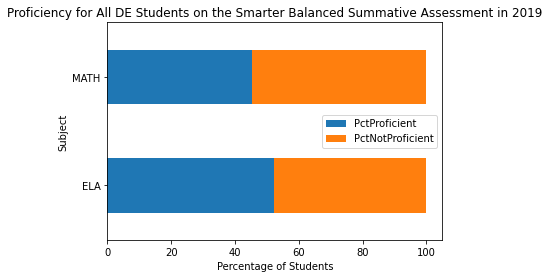

In [10]:
df.plot.barh(x='ContentArea', y=['PctProficient','PctNotProficient'], stacked=True)

plt.ylabel("Subject")
plt.xlabel("Percentage of Students")
plt.title('Proficiency for All DE Students on the Smarter Balanced Summative Assessment in 2019')

plt.show()

In [11]:
all_sbsa_reported.describe()

,District Code,School Year,School Code,Tested,Proficient,PctProficient,ScaleScoreAvg,NotProficient
count,342.000000,342.0,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,254.959064,2019.0,499.222222,1060.464912,515.605263,48.797661,2494.434503,544.859649
std,1449.816044,0.0,608.092255,4879.996721,2386.468559,18.479888,50.947763,2522.995852
min,0.000000,2019.0,0.000000,16.000000,5.000000,3.680000,2349.060000,11.000000
25%,18.000000,2019.0,247.000000,225.250000,99.000000,36.515000,2463.417500,106.250000
50%,32.000000,2019.0,419.000000,343.000000,184.000000,50.840000,2492.625000,158.500000
75%,34.000000,2019.0,664.000000,690.500000,321.000000,61.187500,2526.912500,359.000000
max,9612.000000,2019.0,4080.000000,63008.000000,33459.000000,94.580000,2655.790000,35210.000000


# Charter Schools

In [12]:
df = all_sbsa_reported[all_sbsa_reported['District Type'] != 'Not Applicable'].groupby(['ContentArea','District Type']).mean()
df['PctNotProficient'] = 100-df['PctProficient']
df['onehundred'] = 100
df

District Code  School Year  School Code  \
ContentArea District Type                                            
ELA         Charter          2323.000000       2019.0  1396.823529   
            Regular            26.831169       2019.0   403.675325   
MATH        Charter          2323.000000       2019.0  1396.823529   
            Regular            26.855263       2019.0   401.815789   

                               Tested  Proficient  PctProficient  \
ContentArea District Type                                          
ELA         Charter        409.647059  236.823529      48.265294   
            Regular        722.902597  382.129870      52.590844   
MATH        Charter        410.058824  198.705882      37.807647   
            Regular        734.526316  321.236842      46.244342   

                           ScaleScoreAvg  NotProficient  PctNotProficient  \
ContentArea District Type                                                   
ELA         Charter          2503.885294     172.823529         51.734706   
            Regular          2493.750000     340.772727         47.409156   
MATH        Charter          2495.539412     211.352941         62.192353   
            Regular          2493.758487     413.289474         53.755658   

                           onehundred  
ContentArea District Type              
ELA         Charter               100  
            Regular               100  
MATH        Charter               100  
            Regular               100

In [13]:
df = df.reset_index()

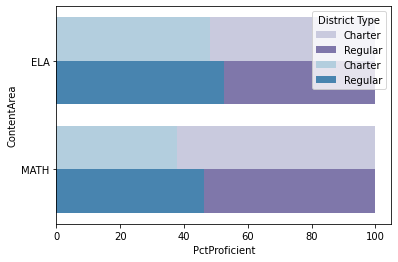

In [14]:
# Trying to do a stacked bar plot with two barplots right on top of each other but I hate it so

sns.barplot(y = 'ContentArea',
           x = 'onehundred',
           hue = 'District Type',
           data = df,
           palette = 'Purples',
           estimator = np.median)
sns.barplot(y = 'ContentArea',
           x = 'PctProficient',
           hue = 'District Type',
           data = df,
           palette = 'Blues',
           estimator = np.median)
plt.show()

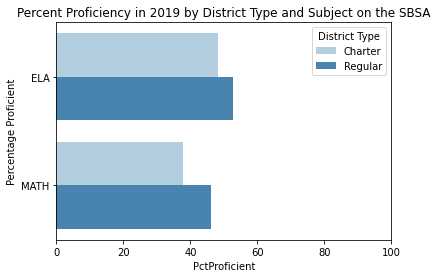

In [15]:
sns.barplot(y = 'ContentArea',
           x = 'PctProficient',
           hue = 'District Type',
           data = df,
           palette = 'Blues',
           estimator = np.median).set(xlim=(0,100))
plt.title("Percent Proficiency in 2019 by District Type and Subject on the SBSA")
plt.ylabel("Percentage Proficient")
plt.show()

In [16]:
df_charter = all_sbsa_reported[all_sbsa_reported['District Type']=='Regular']
df_charter.describe()

,District Code,School Year,School Code,Tested,Proficient,PctProficient,ScaleScoreAvg,NotProficient
count,306.000000,306.0,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,26.843137,2019.0,402.751634,728.676471,351.882353,49.438333,2493.754216,376.794118
std,8.517767,0.0,262.464980,1181.351314,570.437967,17.485538,49.267075,649.844077
min,10.000000,2019.0,0.000000,16.000000,5.000000,4.280000,2349.060000,11.000000
25%,18.000000,2019.0,240.000000,225.000000,104.250000,37.567500,2463.822500,103.750000
50%,31.000000,2019.0,358.000000,337.500000,189.000000,51.700000,2492.540000,156.000000
75%,33.000000,2019.0,667.000000,725.750000,325.500000,61.150000,2526.387500,378.000000
max,37.000000,2019.0,783.000000,7814.000000,3872.000000,87.430000,2619.760000,4747.000000


In [17]:
df_charter = all_sbsa_reported[all_sbsa_reported['District Type']=='Charter']
df_charter.describe()

,District Code,School Year,School Code,Tested,Proficient,PctProficient,ScaleScoreAvg,NotProficient
count,34.000000,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2323.000000,2019.0,1396.823529,409.852941,217.764706,43.036471,2499.712353,192.088235
std,4102.047545,0.0,1500.941411,275.982337,246.952340,25.764294,65.895476,98.162934
min,69.000000,2019.0,543.000000,94.000000,6.000000,3.680000,2391.850000,20.000000
25%,77.000000,2019.0,575.000000,239.000000,47.250000,21.982500,2445.130000,118.750000
50%,86.000000,2019.0,584.000000,369.000000,151.000000,39.675000,2493.290000,175.000000
75%,92.000000,2019.0,588.000000,461.000000,273.750000,64.612500,2532.747500,253.000000
max,9612.000000,2019.0,4080.000000,1120.000000,974.000000,94.580000,2655.790000,451.000000


In [18]:
all_sbsa_reported['isCharter'] = all_sbsa_reported['District Type'] == 'Charter'
df = all_sbsa_reported[all_sbsa_reported['District Type']!= 'Not Applicable']
df

<ipython-input-18-19772ce8b6cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_sbsa_reported['isCharter'] = all_sbsa_reported['District Type'] == 'Charter'


,District Code,District Type,School Year,District,School Code,Organization,Assessment Name,ContentArea,Race,Gender,...,SpecialDemo,Geography,SubGroup,RowStatus,Tested,Proficient,PctProficient,ScaleScoreAvg,NotProficient,isCharter
14410,10,Regular,2019,Caesar Rodney School District,0,Caesar Rodney School District,Smarter Balanced Summative Assessment,ELA,All Students,All Students,...,All Students,All Students,All Students,REPORTED,3808.0,2464.0,64.71,2539.39,1344.0,False
14515,10,Regular,2019,Caesar Rodney School District,0,Caesar Rodney School District,Smarter Balanced Summative Assessment,MATH,All Students,All Students,...,All Students,All Students,All Students,REPORTED,3819.0,1899.0,49.73,2520.93,1920.0,False
14671,10,Regular,2019,Caesar Rodney School District,610,Allen Frear Elementary School,Smarter Balanced Summative Assessment,ELA,All Students,All Students,...,All Students,All Students,All Students,REPORTED,439.0,365.0,83.14,2539.31,74.0,False
14731,10,Regular,2019,Caesar Rodney School District,610,Allen Frear Elementary School,Smarter Balanced Summative Assessment,MATH,All Students,All Students,...,All Students,All Students,All Students,REPORTED,439.0,317.0,72.21,2536.47,122.0,False
14896,10,Regular,2019,Caesar Rodney School District,612,Major George S. Welch Elementary School,Smarter Balanced Summative Assessment,ELA,All Students,All Students,...,All Students,All Students,All Students,REPORTED,195.0,153.0,78.46,2529.95,42.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275875,9606,Charter,2019,First State Montessori Academy,4050,First State Montessori Academy,Smarter Balanced Summative Assessment,MATH,All Students,All Students,...,All Students,All Students,All Students,REPORTED,320.0,164.0,51.25,2504.51,156.0,True
276891,9611,Charter,2019,Great Oaks Charter School,4075,Great Oaks Charter School,Smarter Balanced Summative Assessment,ELA,All Students,All Students,...,All Students,All Students,All Students,REPORTED,303.0,69.0,22.77,2481.90,234.0,True
276951,9611,Charter,2019,Great Oaks Charter School,4075,Great Oaks Charter School,Smarter Balanced Summative Assessment,MATH,All Students,All Students,...,All Students,All Students,All Students,REPORTED,305.0,50.0,16.39,2475.19,255.0,True
277752,9612,Charter,2019,Freire Charter School Wilmington,4080,Freire Charter School,Smarter Balanced Summative Assessment,ELA,All Students,All Students,...,All Students,All Students,All Students,REPORTED,94.0,28.0,29.79,2524.35,66.0,True


In [19]:
#Test difference between charter and not charter on ELA
# I later changed my mind and used a difference of two means test
ela = df[df['ContentArea'] == 'ELA']
test_stat, p = stats.pointbiserialr(ela['isCharter'], ela['PctProficient'])
print("ELA ", test_stat, p, p < 0.05)
print("There is no statistically signficant difference on ELA scores")

ELA  -0.07344294561886468 0.3397613268217242 False
There is no statistically signficant difference on ELA scores


In [20]:
#Test difference between charter and not charter on Math
math = df[df['ContentArea'] == 'MATH']
test_stat, p = stats.pointbiserialr(math['isCharter'], math['PctProficient'])
print("math ", test_stat, p, p < 0.05)
print("There is no statistically signficant difference on math scores")

math  -0.13534168440207434 0.07935079140703025 False
There is no statistically signficant difference on math scores


In [21]:
low_income_sbsa = combined[((combined.SubGroup == 'Low Income') | (combined.SubGroup == 'All Students'))& (combined['Assessment Name'] == 'Smarter Balanced Summative Assessment') & (combined.RowStatus == 'REPORTED') & (combined['School Year'] == 2019)]
low_income_sbsa['isLowIncome'] = low_income_sbsa["SubGroup"] == "Low Income"
low_income_sbsa

<ipython-input-21-f4932e1a8c07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_income_sbsa['isLowIncome'] = low_income_sbsa["SubGroup"] == "Low Income"


,District Code,District Type,School Year,District,School Code,Organization,Assessment Name,ContentArea,Race,Gender,...,SpecialDemo,Geography,SubGroup,RowStatus,Tested,Proficient,PctProficient,ScaleScoreAvg,NotProficient,isLowIncome
3521,0,Not Applicable,2019,State of Delaware,0,State of Delaware,Smarter Balanced Summative Assessment,ELA,All Students,All Students,...,All Students,All Students,All Students,REPORTED,62761.0,33459.0,53.31,2512.05,29302.0,False
3524,0,Not Applicable,2019,State of Delaware,0,State of Delaware,Smarter Balanced Summative Assessment,ELA,All Students,All Students,...,Low-Income,All Students,Low Income,REPORTED,21939.0,7968.0,36.32,2471.00,13971.0,True
3626,0,Not Applicable,2019,State of Delaware,0,State of Delaware,Smarter Balanced Summative Assessment,MATH,All Students,All Students,...,All Students,All Students,All Students,REPORTED,63008.0,27798.0,44.12,2505.54,35210.0,False
3629,0,Not Applicable,2019,State of Delaware,0,State of Delaware,Smarter Balanced Summative Assessment,MATH,All Students,All Students,...,Low-Income,All Students,Low Income,REPORTED,21945.0,6014.0,27.40,2463.25,15931.0,True
14410,10,Regular,2019,Caesar Rodney School District,0,Caesar Rodney School District,Smarter Balanced Summative Assessment,ELA,All Students,All Students,...,All Students,All Students,All Students,REPORTED,3808.0,2464.0,64.71,2539.39,1344.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276951,9611,Charter,2019,Great Oaks Charter School,4075,Great Oaks Charter School,Smarter Balanced Summative Assessment,MATH,All Students,All Students,...,All Students,All Students,All Students,REPORTED,305.0,50.0,16.39,2475.19,255.0,False
276954,9611,Charter,2019,Great Oaks Charter School,4075,Great Oaks Charter School,Smarter Balanced Summative Assessment,MATH,All Students,All Students,...,Low-Income,All Students,Low Income,REPORTED,193.0,25.0,12.95,2461.37,168.0,True
277752,9612,Charter,2019,Freire Charter School Wilmington,4080,Freire Charter School,Smarter Balanced Summative Assessment,ELA,All Students,All Students,...,All Students,All Students,All Students,REPORTED,94.0,28.0,29.79,2524.35,66.0,False
277755,9612,Charter,2019,Freire Charter School Wilmington,4080,Freire Charter School,Smarter Balanced Summative Assessment,ELA,All Students,All Students,...,Low-Income,All Students,Low Income,REPORTED,46.0,14.0,30.43,2509.91,32.0,True


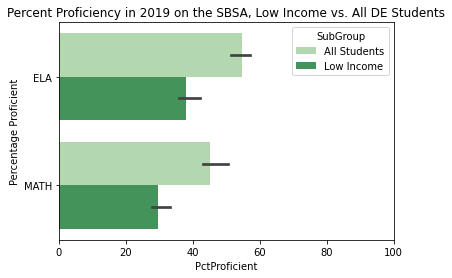

In [22]:
sns.barplot(y = 'ContentArea',
           x = 'PctProficient',
           hue = 'SubGroup',
           data = low_income_sbsa,
           palette = 'Greens',
           estimator = np.median).set(xlim=(0,100))
plt.title("Percent Proficiency in 2019 on the SBSA, Low Income vs. All DE Students")
plt.ylabel("Percentage Proficient")
plt.show()

In [23]:
#Test difference between all and lowincome on ELA
df = low_income_sbsa
ela = df[df['ContentArea'] == 'ELA']
test_stat, p = stats.pointbiserialr(ela['isLowIncome'], ela['PctProficient'])
print("ELA ", test_stat, p, p < 0.05)
print("There is a statistically significant difference in ELA scores between low income and all students")
#Test difference between all and lowincome on Math
math = df[df['ContentArea'] == 'MATH']
test_stat, p = stats.pointbiserialr(math['isLowIncome'], math['PctProficient'])
print("math ", test_stat, p, p < 0.05)
print("There is a statistically significant difference in math scores between low income and all students")

ELA  -0.36210095875217446 5.684500918833291e-12 True
There is a statistically significant difference in ELA scores between low income and all students
math  -0.3502424762721989 3.933759208659052e-11 True
There is a statistically significant difference in math scores between low income and all students


In [34]:
test = 'Smarter Balanced Summative Assessment'
races = ['Hispanic/Latino','African American','White','Asian American','Multi-Racial','Native American','Native Hawaiian/Pacific Islander']
df = combined[(combined['Assessment Name'] == test) & (combined['RowStatus'] == 'REPORTED')& (combined['SubGroup'].isin(races)) & (combined['School Year'] == 2019)]

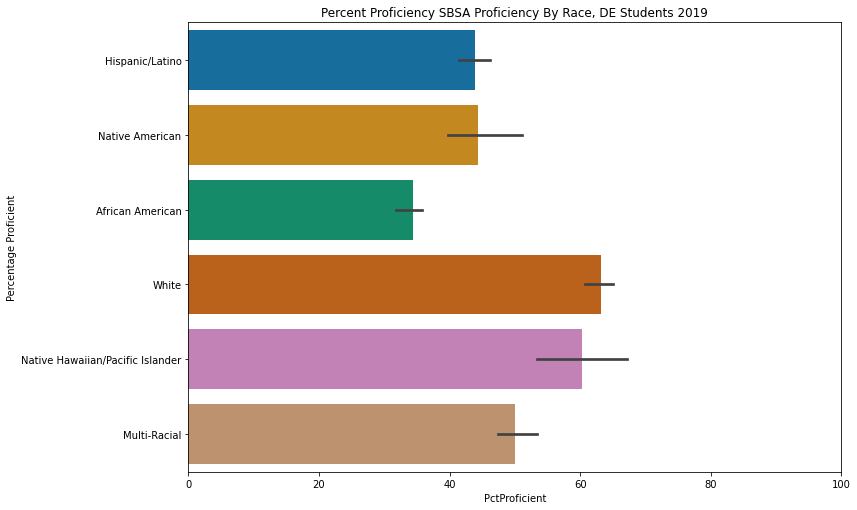

African American                    318
White                               313
Hispanic/Latino                     294
Multi-Racial                        159
Native American                      14
Native Hawaiian/Pacific Islander      2
Name: Race, dtype: int64

In [36]:
sns.barplot(y = 'Race',
           x = 'PctProficient',
           data = df,
           palette = 'colorblind',
           estimator = np.median).set(xlim=(0,100))
plt.rcParams['figure.figsize'] = 11.7,8.27
plt.title("Percent Proficiency SBSA Proficiency By Race, DE Students 2019")
plt.ylabel("Percentage Proficient")
plt.show()
df['Race'].value_counts()

In [27]:
#Test difference between races on SBSA
hl = df[df.Race == 'Hispanic/Latino'].PctProficient
na = df[df.Race =='Native American'].PctProficient
aa = df[df.Race == 'African American'].PctProficient
w = df[df.Race == 'White'].PctProficient
nhpi = df[df.Race == 'Native Hawaiian/Pacific Islander'].PctProficient
mr = df[df.Race == "Multi-Racial"].PctProficient
test_stat, p = stats.f_oneway(hl,na,aa,w,nhpi,mr)
print("Racial Comparison on SBSA ", test_stat, p, p < 0.05)

Racial Comparison on SBSA  93.59255186574192 4.0460804280310654e-82 True


<ipython-input-28-d5d148f1a0e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isCharter'] = df['District Type'] == 'Charter'


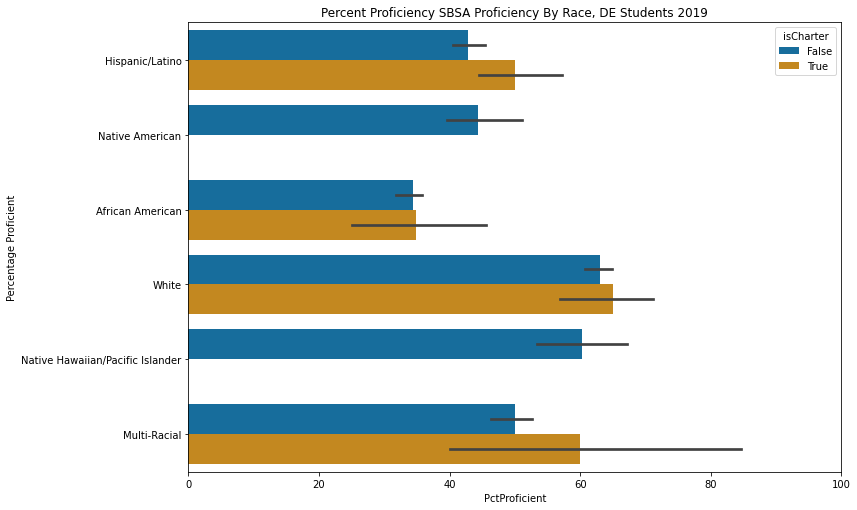

In [28]:
df['isCharter'] = df['District Type'] == 'Charter'
sns.barplot(y = 'Race',
           x = 'PctProficient',
           hue = 'isCharter',
           data = df,
           palette = 'colorblind',
           estimator = np.median).set(xlim=(0,100))
plt.rcParams['figure.figsize'] = 11.7,8.27
plt.title("Percent Proficiency SBSA Proficiency By Race, DE Students 2019")
plt.ylabel("Percentage Proficient")
plt.show()

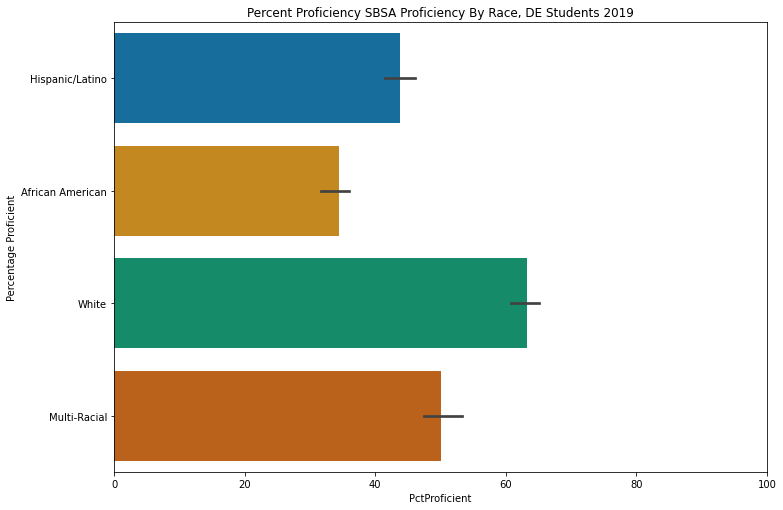

Racial Comparison on SBSA  154.08576516014628 4.003036521973909e-83 True
There is a statistically significant difference between difference percent proficiencies of these races for DE students on the 2019 SBSA.


In [29]:
# Removing Native American and NH/PI because there is not charter data
# So basically redoing everything from above
test = 'Smarter Balanced Summative Assessment'
races = ['Hispanic/Latino','African American','White','Asian American','Multi-Racial']
df = combined[(combined['Assessment Name'] == test) & (combined['RowStatus'] == 'REPORTED')& (combined['SubGroup'].isin(races)) & (combined['School Year'] == 2019)]
sns.barplot(y = 'Race',
           x = 'PctProficient',
           data = df,
           palette = 'colorblind',
           estimator = np.median).set(xlim=(0,100))
plt.rcParams['figure.figsize'] = 11.7,8.27
plt.title("Percent Proficiency SBSA Proficiency By Race, DE Students 2019")
plt.ylabel("Percentage Proficient")
plt.show()
#Test difference between races on SBSA
hl = df[df.Race == 'Hispanic/Latino'].PctProficient
aa = df[df.Race == 'African American'].PctProficient
w = df[df.Race == 'White'].PctProficient
mr = df[df.Race == "Multi-Racial"].PctProficient
test_stat, p = stats.f_oneway(hl,aa,w,mr)
print("Racial Comparison on SBSA ", test_stat, p, p < 0.05)
print("There is a statistically significant difference between difference percent proficiencies of these races for DE students on the 2019 SBSA.")

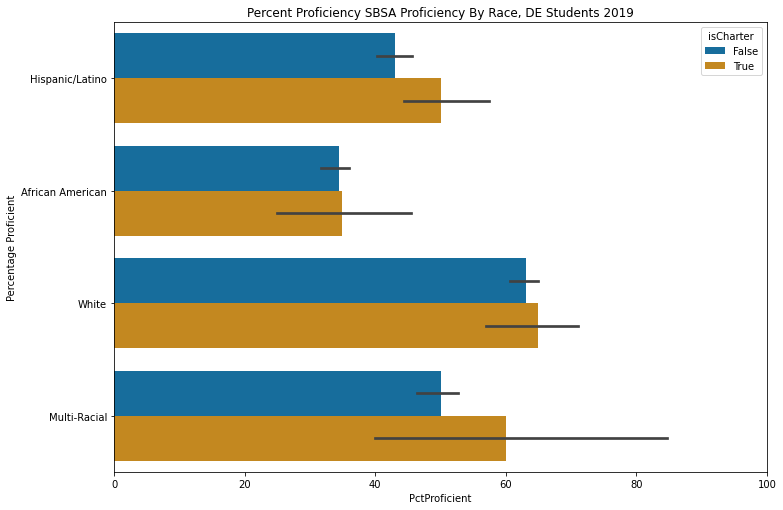

In [30]:
df = df[df['District Type'] != "Not Applicable"]
df['isCharter'] = df['District Type'] == 'Charter'
sns.barplot(y = 'Race',
           x = 'PctProficient',
           hue = 'isCharter',
           data = df,
           palette = 'colorblind',
           estimator = np.median).set(xlim=(0,100))
plt.rcParams['figure.figsize'] = 11.7,8.27
plt.title("Percent Proficiency SBSA Proficiency By Race, DE Students 2019")
plt.ylabel("Percentage Proficient")
plt.show()

This is super duper cool because before the race split, it looked like charter schools just had worse scores; now we see that other factors (higher proportions of students that score worse) likely affected that.

<ipython-input-31-dd5d56d16c80>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isCharter'] = df['District Type'] == 'Charter'


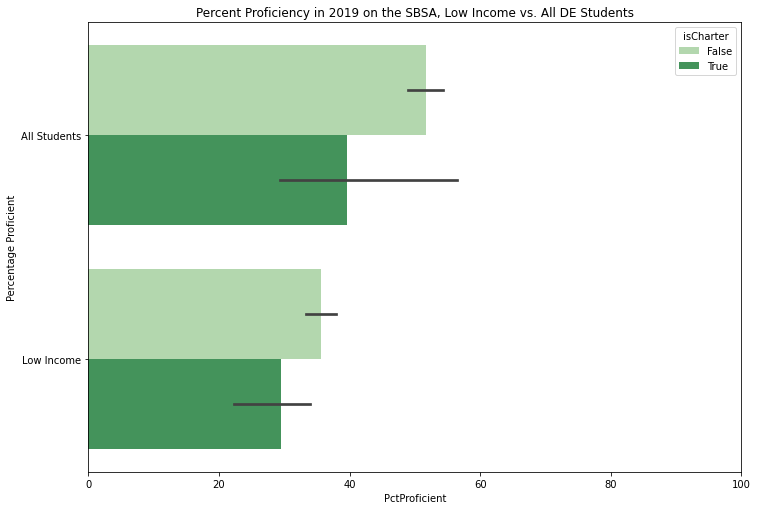

In [31]:
# Doing the same with low income because I don't know why I didn't
df_race = df
df = low_income_sbsa
df = df[df['District Type'] != "Not Applicable"]
df['isCharter'] = df['District Type'] == 'Charter'
sns.barplot(y = 'SubGroup',
           x = 'PctProficient',
           hue = 'isCharter',
           data = df,
           palette = 'Greens',
           estimator = np.median).set(xlim=(0,100))
plt.title("Percent Proficiency in 2019 on the SBSA, Low Income vs. All DE Students")
plt.ylabel("Percentage Proficient")
plt.show()